<p style="text-align: right;"> &#9989; Put your name here</p>


# Pre-Class Assignment: Fast Fourier Transform

## Goals for today's pre-class assignment

</p>

1. Videos about the Fourier Series and Fourier Transforms
1. Creating an Example Periodic Signal
1. Applying the Fast Fourier Transform
1. Inverse Fast Fourier Transform



----
# 1. Videos about the Fourier Series and Fourier Transforms

In this pre-class assignment is going to try to help you get some intuition about a really cool mathematical tool called a Fourier Transform.  Another really good tutorial can be found here:

https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

Please watch the following videos about Fourier Series and Fourier Transforms.  Although the math is interesting I would like to focus on bigger picture about what the transform is doing.  We actually don't have to understand the details of the math to use the technique in scientific modeling (although knowing the math can be help). 

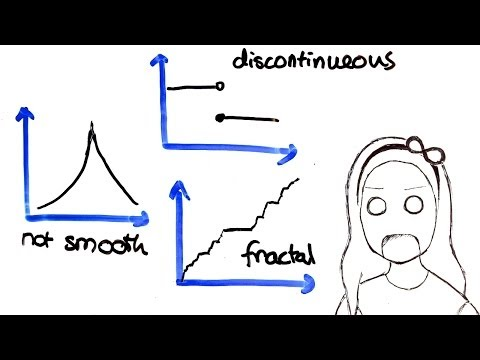

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("kP02nBNtjrU",width=640,height=360)

**Question 1:** According to this video, what is the Fourier Series used for?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text). Please use approiate Markup formating to make your answer's easy to read.

**Question 2:**  What mathematical technique is used to combine the simple functions needed to estimate an interval?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

## 2. What is the Fourier Transform

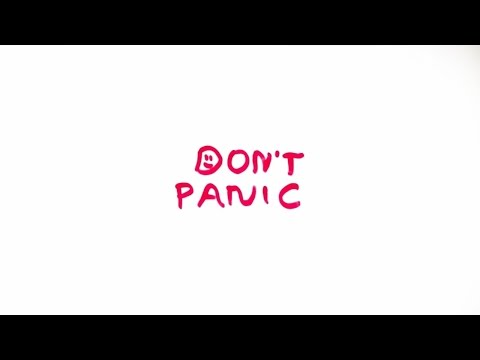

In [2]:
# the command below this comment actually displays a specific YouTube video,  
# with a given width and height.  You can watch the video in full-screen (much higher
# resolution) mode by clicking the little box in the bottom-right corner of the video.

from IPython.display import YouTubeVideo
YouTubeVideo("Xxut2PN-V8Q",width=640,height=360)

**Question 3:** A Fourier Series is used to estimate an finite interval.  What interval is be estimated by the Fourier Transform? 

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

# 2. Creating an Example Periodic Signal
Okay lets play with some of this math. Lets create an example "signal" which we can module using the Fourier Series. At this point we don't have to understand all of the math but we do want to try and gain some intuition about how Fourier Transforms work.  

Lets start by creating an artificial, **Periodic** function.  A Periodic function is one that repeats (like a sin wave).  We will combine two sign waves and a little noise (error).  

$$F(x) = A1\cdot\sin(f1\cdot x) + A2\cdot\sin(f2\cdot x) + e$$ 
$$A1, A2 = \text{Amplitudes of first and second} \sin \text{waves}$$
$$f1, f2 = \text{Frequency of first and second} \sin \text{waves}$$
$$e = \text{random error}$$

Logically this should be a really easy function to estimate with a Fourier Transform since the transforms estimates functions with a linear combination of sin waves and our function is already a linear combination of sin waves.  

**A.** The first step is to create a vector of evenly spaced values from zero to 2$\pi$. To do this we will use the numpy linspace command:

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

N = 300 #number of samples
# Make a vector of evely spaced valuse from zero to 2*pi
x = np.linspace(0,2*np.pi,N)

**B.** Next we make the first $\sin$ function.  Lets have a frequency of 2 and an amplitude of 10.
$$10\sin(2x)$$

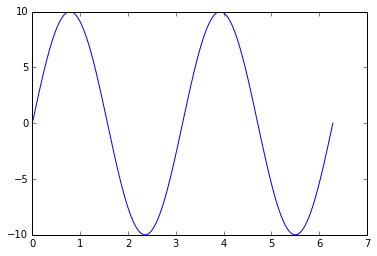

In [2]:
# Create a sign wave
A1 = 10
f1 = 2
y1 = A1*np.sin(f1*x)
plt.axis()
plt.plot(x,y1)

**C.** Make the second $\sin$ function have a frequency of 20 and an amplitude of 3.
$$3\sin(20x)$$

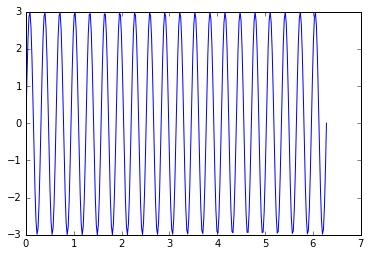

In [3]:
# Create a sign wave
A2 = 3
f2 = 20
y2 = A2*np.sin(f2*x)
plt.plot(x,y2)

**D.** Now we can add the two frequencies together and get a combined signal:
$$10\sin(2x)+3\sin(20x)$$

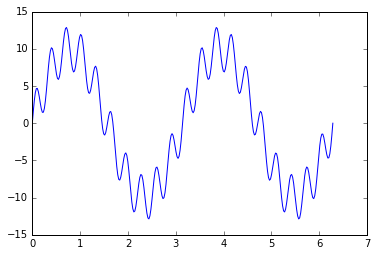

In [4]:
plt.plot(x,y1+y2)

**E.** Finally, lets create some random noise between 0 and 2 and add it to the signal to make it more "natural".

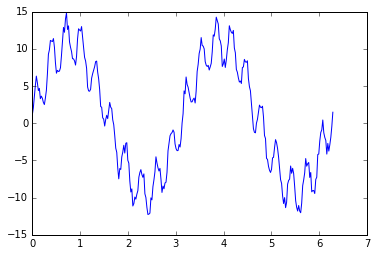

In [5]:
e = np.random.rand(N)*2
plt.plot(x,y1+y2+e)

----
## 3. Applying the Fast Fourier Transform

Okay now we have a periodic (repeating) signal.  Lets transform it to the frequency domain by applying the Fast Fourier Transform (FFT). You can call the FFT function inside of numpy as show below.  The FFT function returns a vector of imaginary numbers the same size as the input vector, this vector is often called the "frequency domain":

In [6]:
Fs = np.fft.fft(y1+y2+e)
print(Fs)

[  2.76384842e+02 +0.00000000e+00j   6.59593752e+00 -5.49976671e-01j
   2.35074899e+01 -1.50706628e+03j   5.40836272e+00 +8.54927185e+00j
   6.99316768e+00 -6.33036286e+00j  -4.87608714e+00 -2.02666942e+00j
   2.51672378e+00 +1.42333418e+01j   9.14738521e+00 +1.82465611e+01j
  -7.70798749e+00 -3.31652667e+00j   6.63043999e+00 -9.89394966e+00j
  -4.65719520e-01 -5.35983287e+00j  -6.99617256e+00 +8.48874691e+00j
   1.69262346e+00 +3.08738009e+00j   8.93789703e+00 +6.24213782e+00j
   2.82180835e+00 -4.46631101e+00j  -9.60041481e+00 -8.69082142e+00j
   8.93952758e+00 +6.55810128e+00j   6.35286043e+00 -1.13767739e+01j
   3.11032405e+00 -1.29146054e+01j  -1.46885472e+00 -2.85921412e+01j
   8.52903014e+01 -4.21887182e+02j  -4.11950692e+00 +2.10968955e+01j
  -5.75522519e+00 +1.50039237e+01j  -1.12436606e+01 +1.86489979e+01j
  -1.08952524e+00 +8.95071064e+00j  -1.13308777e+01 +1.57768143e+01j
   5.21236167e+00 +1.27921524e+01j  -3.90706549e+00 +1.15250100e+01j
  -1.84699752e+00 +6.08052265e+00j

The above numbers represent the contributions of each frequency to the original signal.  For each item in the vector there is a real and imaginary component (the imaginary component has a "j" next to it).   We can just ignore the imaginary component for now by taking the absolute value of the frequency space and plot the result:

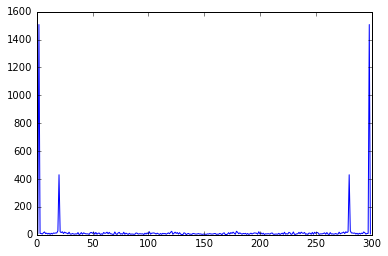

In [7]:
plt.plot(abs(Fs))

This graph shows the contribution of each frequency to the original signal.  As you can see there are four spikes in the graph and the graph is symmetric.  Typically we often choose to just plot half of the space to see more detail. We can do this as follows:

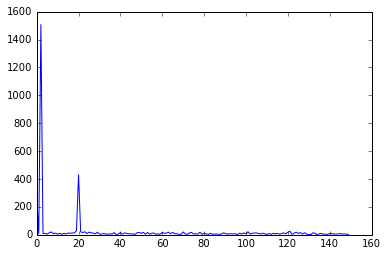

In [8]:
plt.plot(abs(Fs[:int(N/2)]))

We can see two spikes in the frequency space that represent the frequencies of our two sin wave input signals.  One has an frequency of 2 and the second has a frequency of 20. 

**Question 4:**  What Happens to the Frequency domain if you increase the contribution of the noise in the original signal? 

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

**Question 5:**  Modify the code in sections 1 to change the input signals so that f1=10 and f2 = 100. What happens to the spikes in the frequency domain?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)


---

# 3. Inverse Fast Fourier Transform
One of the neat things about an FFT is that it is reversible.  We can take the Frequency space as an input and return a signal using the inverse Fast Fourier Transform (ifft).  Lets try to do that now.  I am going to create a new frequency vector with a spikes at 2 and 30 (note I do this twice to maintain the symmetry):

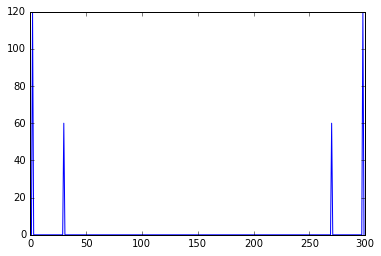

In [9]:
Fs2 = np.zeros(N)
Fs2[2] = 120
Fs2[-2] = 120
Fs2[30] = 60
Fs2[-30] = 60
plt.plot(Fs2)

Now we use the ifft function (inverse Fast Fourier Transform) to generate a periodic symbol similar to our original (well, without the noise).  Note we will get a warning because we didn't include an imaginary component which we can actually ignore for these types of problems:

/opt/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


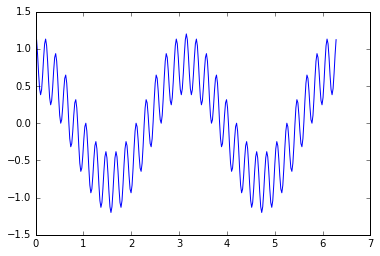

In [10]:
yy = np.fft.ifft(Fs2)
plt.plot(x,yy)

**Question 6:**  Modify the above artificially created frequency space to include a spike of 40 at a frequency of 100? (make sure your signal is symmetric). 

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

----
# 4. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

Direct Link: https://goo.gl/LFdn12

In [2]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/LFdn12?embedded=true" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).

&#169; Copyright 2017,  Michigan State University Board of Trustees